In [1]:
import nibabel as nib
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [249]:
# Funktion zum Laden von NIfTI-Dateien und Konvertierung in Listen von 2D-Slices
def normalize(data,idx):
    sample = data[idx, :, :]
    sample = sample * 255 / np.max(sample)
    return sample.astype(np.uint8)

def load_nifti_as_slices(filepath):
    nifti_img = nib.load(filepath)
    nifti_data = nifti_img.get_fdata()
    # Konvertiere das 3D-Bild in eine Liste von 2D-Slices
    slices = [normalize(nifti_data,i) for i in range(nifti_data.shape[0])]
    return slices

# Funktion zum Laden von JSON-Dateien
def load_json_file(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data

In [250]:
# Lade alle NIfTI-Dateien in einem Ordner
nii_folder_path = 'COMULIS3DCLEM/imagesTr'
nii_files = glob.glob(os.path.join(nii_folder_path, '*.nii.gz'))
nii_files.sort()
nifti_images = [load_nifti_as_slices(f) for f in nii_files]

In [251]:
# Lade die JSON-Datei
json_filepath = 'COMULIS3DCLEM/COMULIS3DCLEM_dataset.json'
json_data = load_json_file(json_filepath)

# Zeige die Inhalte der JSON-Datei an
print(json_data)

{'name': 'COMULIS3DCLEM', 'release': '1.0', 'description': 'Automatic multimodal microscopy 3D image registration is an unsolved problem in image processing. The aim of this first challenge, organized by the COMULISglobe society,  is to set up the basis of a recurrent challenge, Electronic microscopy EM 3D image data -- Focused Ion Beam Scanning Electron  (FIB SEM) and Serial Block Face Scanning Electron Microscopy (SBF SEM) --  were captured on the same cell area as light microscopy  LM 3D image data (Super resolution fluorescence microscopy ). They were acquired with variable volume sizes (~15000 × ~15000 x ~10000 for isotropic raw EM data and ~2000x~2000x100 for anisotropic raw LM data  ) and field of views (approx.75 x 75 X 50 micrometers3). The in-plane resolution was constant (isotropic voxel size of 0.005 micrometers for EM, 0.035 micrometers in xy and 0.13 micrometers for light microscopy). EM data is non specific and shows all organels. LM data is specific and is composed of t

In [252]:
print(nii_files)

['COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0000_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0000_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0001_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0001_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0002_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0002_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0003_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0003_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0004_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0004_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0005_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0005_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0006_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0006_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0007_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0007_0001.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULIS3DCLEM_0008_0000.nii.gz', 'COMULIS3DCLEM/imagesTr/COMULI

In [253]:
print(len(nifti_images))

160


In [254]:
print(len(nifti_images[0]))

32


In [262]:
image = 34
slice = 5
threshold = 15

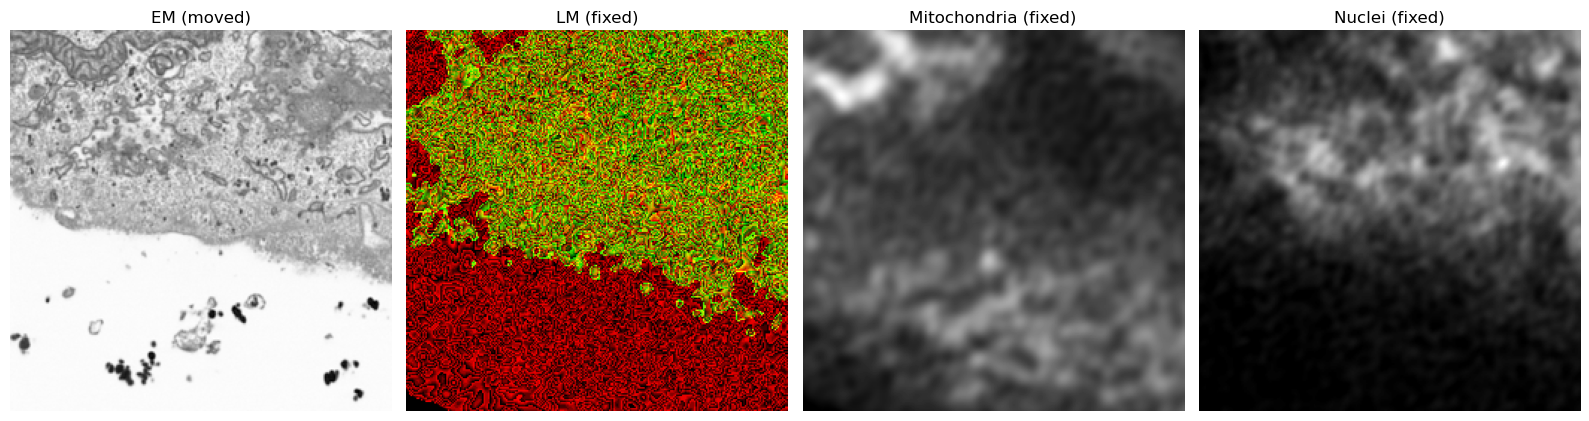

In [263]:
reshaped_array = nifti_images[2*image+1][slice].reshape(256, 256, 2)
zeros_channel = np.zeros((256, 256, 1))
new_array = np.concatenate((reshaped_array, zeros_channel), axis=2)
min_val = np.min(new_array)
max_val = np.max(new_array)
normalized_array = (new_array - min_val) * 255. / (max_val - min_val)
normalized_array = normalized_array.astype(np.uint8)
normalized_array[normalized_array >= threshold] *= 50
normalized_array[normalized_array < threshold] = 0

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16,8))
ax0.imshow(nifti_images[2*image][slice],cmap='gray')
ax0.set_title("EM (moved)")
ax0.axis("off")
ax1.imshow(normalized_array)
ax1.set_title("LM (fixed)")
ax1.axis("off")
ax2.imshow(nifti_images[2*image+1][slice][:,:,:,0],cmap='gray')
ax2.set_title("Mitochondria (fixed)")
ax2.axis("off")
ax3.imshow(nifti_images[2*image+1][slice][:,:,:,1],cmap='gray')
ax3.set_title("Nuclei (fixed)")
ax3.axis("off")
fig.tight_layout()

In [223]:
print(json_data["training_paired_images"][0])

{'fixed': './imagesTr/COMULIS3DCLEM_0000_0000.nii.gz', 'moving': './imagesTr/COMULIS3DCLEM_0000_0001.nii.gz'}
